<a href="https://colab.research.google.com/github/Swagat-modder/DA-DS-portfolio/blob/main/Olympics_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
reg=pd.read_csv("/content/noc_regions.csv")
res=pd.read_csv("/content/results.csv")

In [ ]:
res.rename(columns={'noc': 'NOC'}, inplace=True)

In [ ]:
reg.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
res.head(2)

,year,type,discipline,event,as,athlete_id,NOC,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN


**Merging datasets**

In [ ]:
df=res.merge(reg,how="left",on="NOC")
df.head()

,year,type,discipline,event,as,athlete_id,NOC,team,place,tied,medal,region,notes
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,France,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,France,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,France,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,France,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,France,NaN


In [ ]:
df.shape

(308408, 13)

In [ ]:
df.rename(columns={'NOC': 'noc'}, inplace=True)

In [ ]:
df.isnull().sum()

,0
year,2601
type,2601
discipline,1
event,0
as,0
athlete_id,0
noc,1
team,186694
place,25215
tied,0


In [ ]:
#India details
df.query("region=='India'").head()


,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,region,notes
774,1992.0,Summer,Badminton,"Singles, Women (Olympic)",Madhumita Bisht,270,IND,NaN,17.0,True,NaN,India,NaN
775,1924.0,Summer,Tennis,"Singles, Women (Olympic)",Nora Polley,271,IND,NaN,9.0,True,NaN,India,NaN
776,1924.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Nora Polley,271,IND,Sydney Jacob,9.0,True,NaN,India,NaN
777,1996.0,Summer,Table Tennis,"Singles, Women (Olympic)",Ambika Radhika,272,IND,NaN,49.0,True,NaN,India,NaN
778,1988.0,Summer,Table Tennis,"Singles, Women (Olympic)",Niyati Roy,273,IND,NaN,41.0,True,NaN,India,NaN


In [ ]:
#japan details
df.query("region=='Japan'").head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,region,notes
2105,1992.0,Summer,Tennis,"Singles, Women (Olympic)",Kimiko Date,835,JPN,NaN,17.0,True,NaN,Japan,NaN
2106,1992.0,Summer,Tennis,"Doubles, Women (Olympic)",Kimiko Date,835,JPN,Maya Kidowaki,9.0,True,NaN,Japan,NaN
2107,1996.0,Summer,Tennis,"Singles, Women (Olympic)",Kimiko Date,835,JPN,NaN,5.0,True,NaN,Japan,NaN
2108,1992.0,Summer,Tennis,"Singles, Women (Olympic)",Mana Endo,836,JPN,NaN,17.0,True,NaN,Japan,NaN
2109,1988.0,Summer,Table Tennis,"Singles, Women (Olympic)",Mika Hoshino,837,JPN,NaN,9.0,True,NaN,Japan,NaN


In [ ]:
#Top countries participating
top_count=df.region.value_counts().sort_values(ascending=False).head(10)
top_count

,count
region,
USA,21353
Germany,17397
France,14276
UK,13170
Russia,12187
Italy,12129
Canada,11455
Japan,9882
Sweden,9305


Text(0.5, 1.0, 'Top Countries Participated')

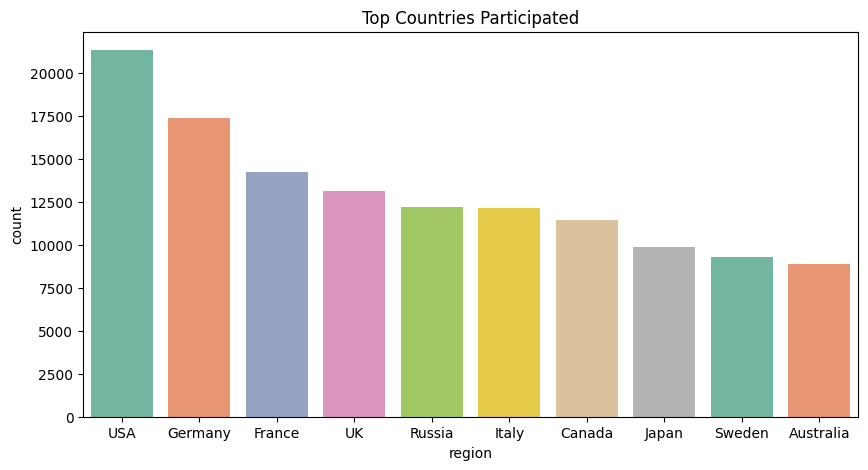

In [ ]:
#plotting the above data
plt.figure(figsize=(10,5))
sns.barplot(x=top_count.index,y=top_count,palette='Set2')
plt.title("Top Countries Participated")


In [ ]:
#winter sports
winter_sports=df.query("type=='Winter'").discipline.value_counts().sort_values(ascending=False).head(10)
winter_sports

,count
discipline,
Cross Country Skiing (Skiing),11791
Alpine Skiing (Skiing),11102
Biathlon,7138
Speed Skating (Skating),6734
Ice Hockey (Ice Hockey),6731
Bobsleigh (Bobsleigh),3576
Figure Skating (Skating),2895
Ski Jumping (Skiing),2885
Short Track Speed Skating (Skating),2509


In [ ]:
#summer olympics sports
summer_sports=df.query("type=='Summer'").discipline.value_counts().sort_values(ascending=False).head(10)
summer_sports

,count
discipline,
Athletics,45052
Artistic Gymnastics (Gymnastics),27550
Swimming (Aquatics),26408
Fencing,11945
Shooting,11715
Rowing,11057
Football (Football),7461
Wrestling,7391
Sailing,6959


In [ ]:
#Total no of medal counts
df.medal.value_counts()

,count
medal,
Bronze,14810
Gold,14783
Silver,14546


In [ ]:
#Gold medals from each country

# Filter for gold medals
gold_medals = df[df['medal'] == 'Gold']

# Group by region and count the gold medals
gold_medal_count = gold_medals.groupby('region')['medal'].count().sort_values(ascending=False).head(10)


print(gold_medal_count)


region
USA        2717
Russia     1637
Germany    1368
UK          715
Italy       605
France      589
Canada      555
Sweden      517
China       469
Hungary     458
Name: medal, dtype: int64


Text(0.5, 1.0, 'Top Countries with Gold Medals')

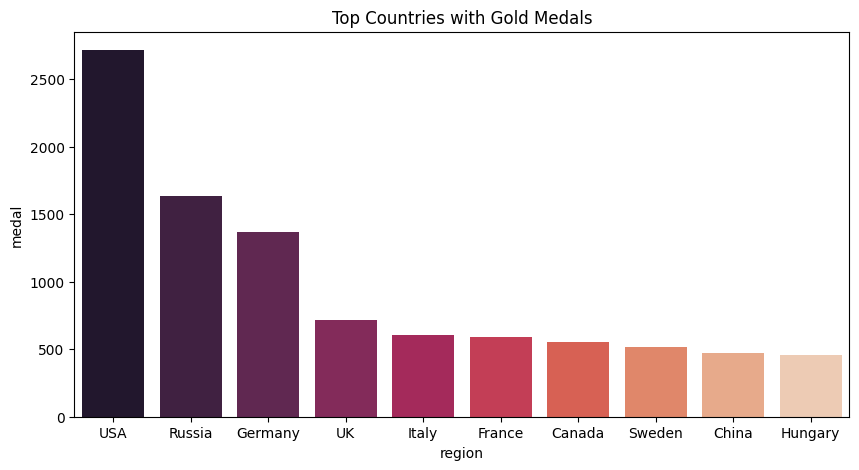

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=gold_medal_count.index,y=gold_medal_count,palette='rocket')
plt.title("Top Countries with Gold Medals")


region
USA          316
Japan        170
France       165
China        157
UK           133
Australia    125
Germany      108
Canada       107
Italy         85
Spain         80
Name: medal, dtype: int64


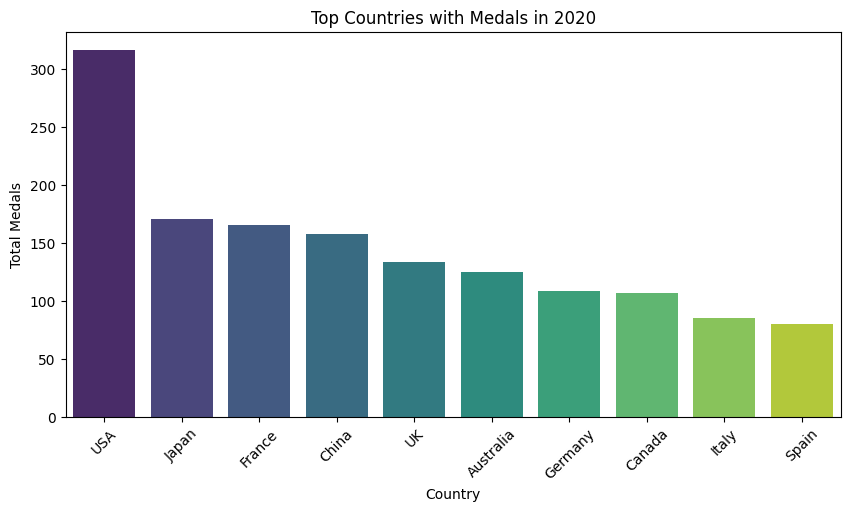

In [ ]:
# prompt: Year 2020 country wise medals
df_2020 = df[df['year'] == 2020]

# Group by region and count the medals
medals_2020 = df_2020.groupby('region')['medal'].count().sort_values(ascending=False).head(10)

# Print the result
print(medals_2020)

# Plotting the results
plt.figure(figsize=(10, 5))
sns.barplot(x=medals_2020.index, y=medals_2020, palette='viridis')
plt.title("Top Countries with Medals in 2020")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.show()


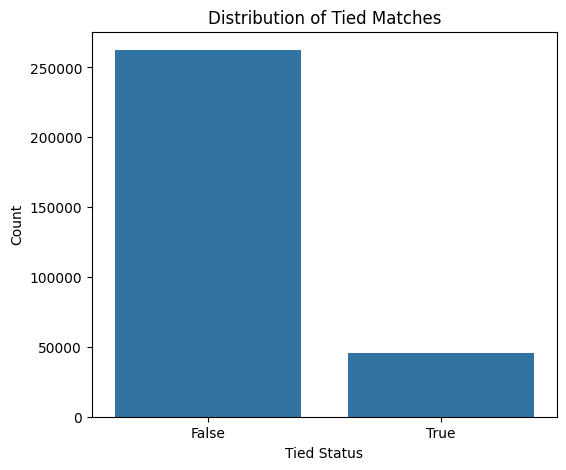

In [ ]:
# Count the occurrences of each value in the 'tied' column
tied_counts = df['tied'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=tied_counts.index, y=tied_counts.values)
plt.title("Distribution of Tied Matches")
plt.xlabel("Tied Status")
plt.ylabel("Count")
plt.show()
